In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
train = pd.read_csv('../kaggle-toxicity/jigsaw-unintended-bias-in-toxicity-classification/train.csv')
print('loaded %d records' % len(train))

test = pd.read_csv('../kaggle-toxicity/jigsaw-unintended-bias-in-toxicity-classification/test.csv')

loaded 1804874 records


In [5]:
train.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [6]:
train =  train.fillna(0.0)

In [7]:
train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [6]:
label_list = train.columns
print(label_list)

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')


In [7]:
minority_list = ['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white']

In [8]:
label_list = minority_list
train_filtered = train.filter(items=label_list)
train_filtered.head()
train_filtered.shape

(1804874, 24)

In [9]:
train_filtered['count_minority'] = train_filtered['asian']
minority_count_list = []
for i in range(train_filtered.shape[0]):
    if i%100000==0: print(i)
    minority_count_list.append((len(pd.Series.nonzero(train_filtered.iloc[i])[0]), train.id.values[i]))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [10]:
train_filtered

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,count_minority
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_filtered.iloc[0].jewish

0.0

In [12]:
minority_count_list = []
for minority in minority_list:
    print(minority)
    print('\n')
    minority_common_ratio = []
    for minority_test in minority_list:
        if minority_test!=minority:
            print(minority_test)
            count = 0
            for i in range(train_filtered[train_filtered[minority_test]>0].shape[0]):
                if train_filtered.iloc[i][minority]!=0: count+=1
            minority_common_ratio.append(count/train_filtered[train_filtered[minority_test]>0].shape[0])
    minority_count_list.append(minority_common_ratio)
    print(minority_count_list)

asian


atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716]]
atheist


asian
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino

atheist
bisexual
black
buddhist
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530

atheist
bisexual
black
buddhist
christian
female
heterosexual
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.0044958

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.0044958253050738

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.00182

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.0044958253050

atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.0044958

In [13]:
minority_count_list_filtered = [value for value in minority_count_list if value[0]>0]
minority_count_list_filtered

[[0.002663115845539281,
  0.003003003003003003,
  0.00342483259213822,
  0.0036603221083455345,
  0.0024445893089960887,
  0.002849776089021577,
  0.0028960324355632784,
  0.0032113037893384713,
  0.0033318089762853598,
  0.0033987915407854984,
  0.0034846400733608437,
  0.0034602076124567475,
  0.002905997829855698,
  0.0031144465290806754,
  0.0028208744710860366,
  0.003672420124862284,
  0.0033921662161445912,
  0.0035859431030360986,
  0.002883762200532387,
  0.0030988534242330336,
  0.0035630567276136896,
  0.003594771241830065,
  0.0030052090289835716],
 [0.002460136674259681,
  0.004204204204204204,
  0.001737974748249246,
  0.0021961932650073207,
  0.001271186440677966,
  0.0011399104356086308,
  0.00405444540978859,
  0.00449582530507386,
  0.0018292284575684328,
  0.004531722054380665,
  0.0024759284731774417,
  0.0028835063437139563,
  0.0010601279636812632,
  0.0016135084427767355,
  0.004231311706629055,
  0.0044069041498347415,
  0.0017490857051995548,
  0.00173320583313

In [14]:
from collections import Counter
Counter(elem[0] for elem in minority_count_list)

Counter({0.002663115845539281: 1,
         0.002460136674259681: 1,
         0.0030979498861047837: 2,
         0.01366742596810934: 1,
         0.0009111617312072893: 1,
         0.02296127562642369: 1,
         0.04182232346241458: 1,
         0.0002733485193621868: 1,
         0.013758542141230068: 1,
         0.0023690205011389523: 2,
         0.0034624145785876995: 1,
         0.0031890660592255125: 1,
         0.04318906605922551: 1,
         0.0047380410022779046: 1,
         0.0016400911161731208: 1,
         0.0015489749430523919: 1,
         0.006104783599088838: 1,
         0.008200455580865604: 1,
         0.0019134396355353076: 1,
         0.010022779043280182: 1,
         0.002642369020501139: 1,
         0.016309794988610477: 1})

In [15]:
minority_count_list_filtered = [value for value in minority_count_list if value[0]>15]
minority_count_list_filtered

[]

In [18]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.hist(train.target.values,bins=15)
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
minority_count_list_value_filter = [elem[0] for elem in minority_count_list if elem[0]>-1]

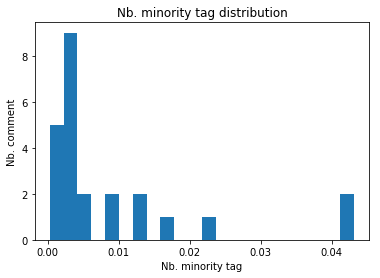

In [20]:
plt.figure(1)
plt.hist(minority_count_list_value_filter,bins=22)
plt.xlabel('Nb. minority tag')
plt.ylabel('Nb. comment')
plt.title('Nb. minority tag distribution')
plt.show()

In [21]:
list_minority_count = []
for minority in minority_list:
    list_minority_count.append((train[train[minority] > 0].shape[0],minority))

In [22]:
list_minority_count_sort = sorted(list_minority_count, key = lambda x: x[0], reverse=True)

In [23]:
print(list_minority_count_sort)

[(80179, 'male'), (73690, 'female'), (61360, 'christian'), (29948, 'white'), (26650, 'muslim'), (19563, 'black'), (18867, 'other_race_or_ethnicity'), (16732, 'other_religion'), (15307, 'homosexual_gay_or_lesbian'), (10975, 'asian'), (10905, 'jewish'), (10665, 'psychiatric_or_mental_illness'), (6936, 'latino'), (6120, 'transgender'), (4508, 'other_sexual_orientation'), (3545, 'other_disability'), (3453, 'heterosexual'), (3330, 'bisexual'), (3227, 'physical_disability'), (2723, 'other_gender'), (2648, 'intellectual_or_learning_disability'), (2253, 'atheist'), (1557, 'hindu'), (1366, 'buddhist')]


In [24]:
ratio_toxicity_minority_list= []
for index,minority in enumerate(minority_list):
    train_minority = train[train[minority]>0]
    size_minority = train_minority.shape[0]
    ratio = train_minority.target.values.mean()
    nb_toxic = train_minority[train_minority.target>0.5].shape[0]
    nb_non_toxic = train_minority[train_minority.target<0.5].shape[0]
    ratio_toxicity_minority_list.append((minority,ratio,nb_toxic,nb_non_toxic,size_minority))
    
ratio_toxicity_minority_list_sorted = sorted(ratio_toxicity_minority_list,key=lambda x: -x[4])
ratio_toxicity_minority_list_sorted

[('male', 0.17632036611499413, 8284, 68382, 80179),
 ('female', 0.17308306939633727, 7215, 63264, 73690),
 ('christian', 0.13041887730879986, 3418, 55915, 61360),
 ('white', 0.28412818356604236, 5350, 22135, 29948),
 ('muslim', 0.24743516632768334, 3731, 21007, 26650),
 ('black', 0.29238429896513674, 3745, 14097, 19563),
 ('other_race_or_ethnicity', 0.17781430194370257, 1767, 16169, 18867),
 ('other_religion', 0.16140883733312195, 1288, 14710, 16732),
 ('homosexual_gay_or_lesbian', 0.27673833186401364, 2612, 11459, 15307),
 ('asian', 0.14879181596142832, 819, 9746, 10975),
 ('jewish', 0.19568093928758792, 1028, 9290, 10905),
 ('psychiatric_or_mental_illness', 0.23604677790264278, 1802, 8253, 10665),
 ('latino', 0.1879016433890461, 747, 5813, 6936),
 ('transgender', 0.21365797270128992, 685, 5038, 6120),
 ('other_sexual_orientation', 0.21401520466574137, 547, 3697, 4508),
 ('other_disability', 0.16472473908112065, 311, 3088, 3545),
 ('heterosexual', 0.24113875489739034, 464, 2735, 3453)

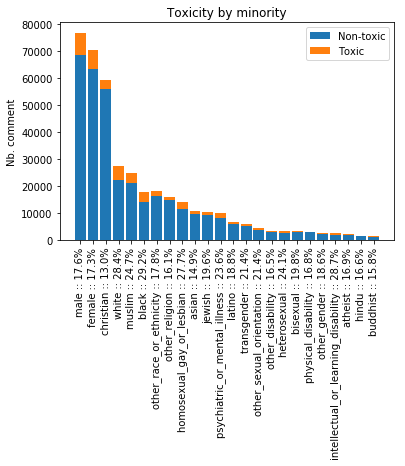

In [25]:
N = len(ratio_toxicity_minority_list_sorted)
toxicity_list = tuple([elem[2] for elem in ratio_toxicity_minority_list_sorted])
non_toxicity_list = tuple([elem[3] for elem in ratio_toxicity_minority_list_sorted])

ind = np.arange(N)    # the x locations for the groups
width = 0.85       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, non_toxicity_list, width)
p2 = plt.bar(ind, toxicity_list, width,bottom=non_toxicity_list)

plt.ylabel('Nb. comment')
plt.title('Toxicity by minority')
plt.xticks(ind, tuple([elem[0]+' :: '+str(np.round(elem[1]*100,1))+'%' for elem in ratio_toxicity_minority_list_sorted]),  rotation=90)
plt.yticks(np.arange(0, 80179, 10000))
plt.legend((p1[0], p2[0]), ('Non-toxic', 'Toxic'))

plt.show()

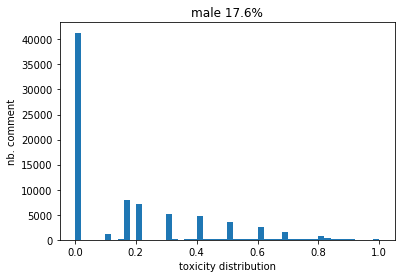

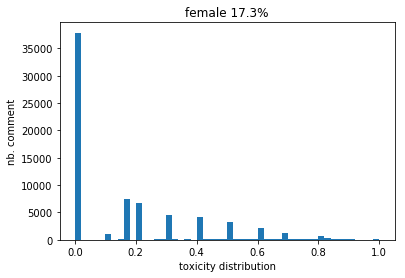

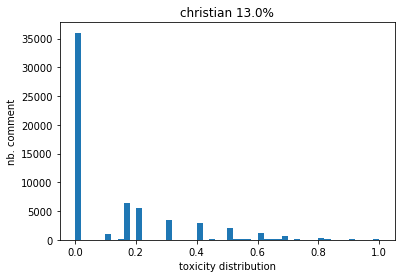

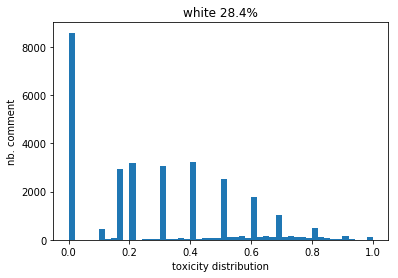

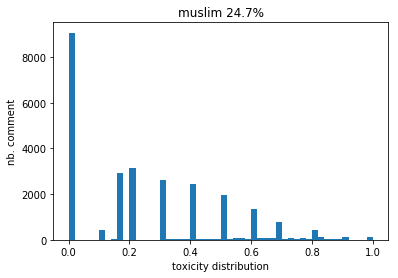

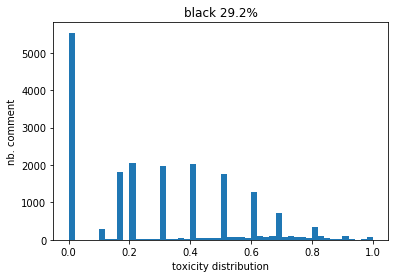

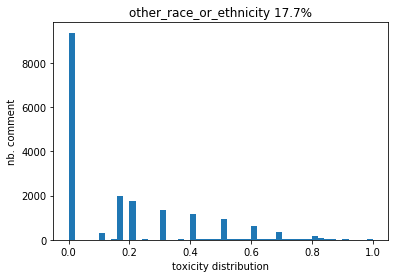

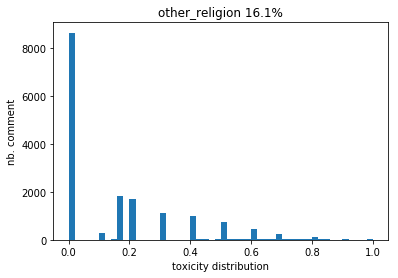

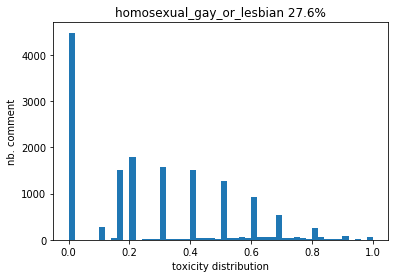

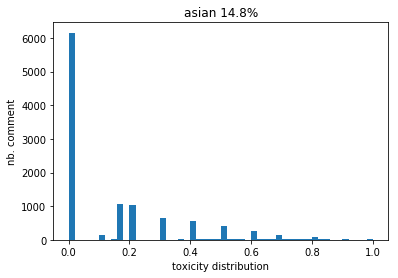

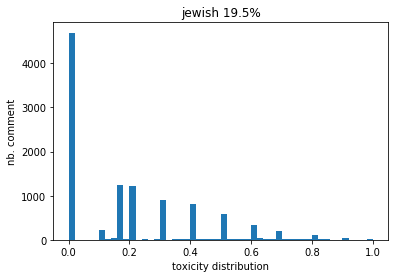

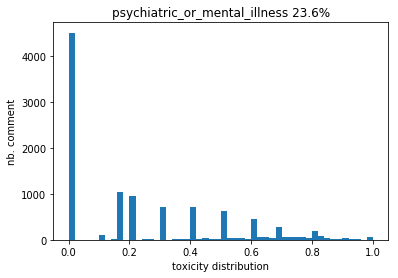

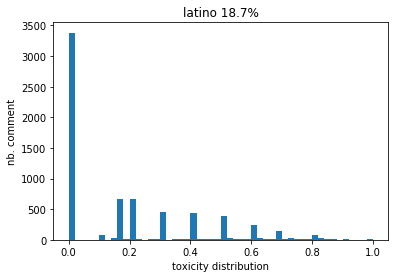

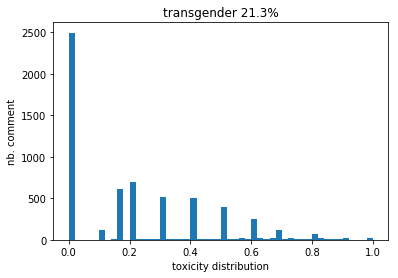

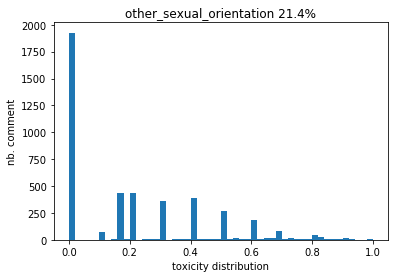

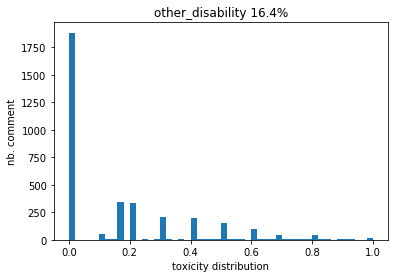

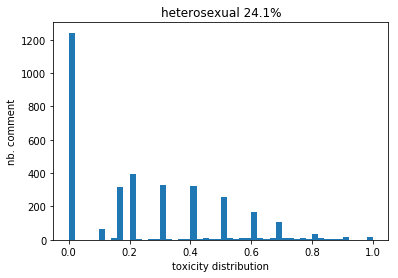

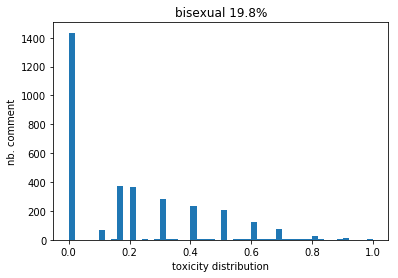

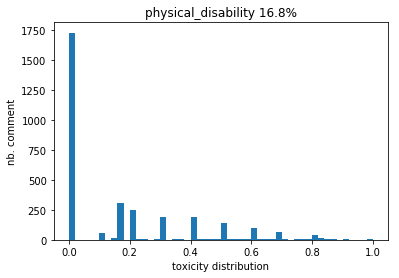

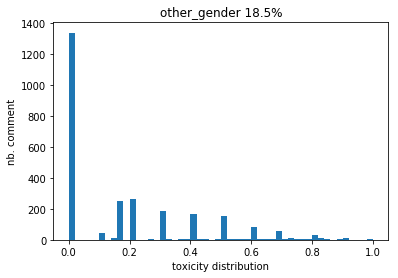

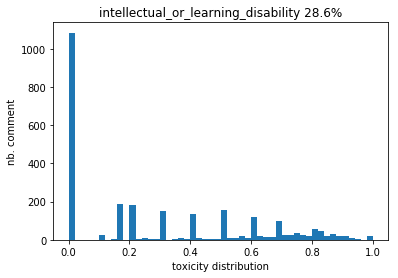

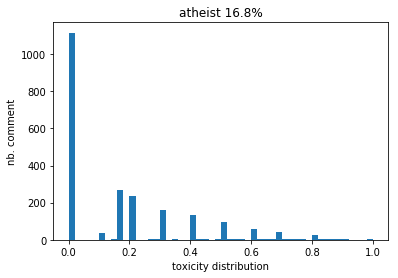

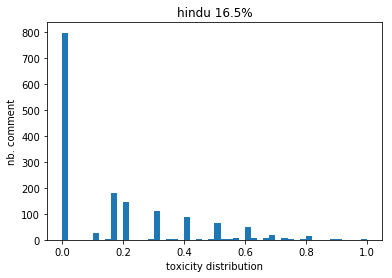

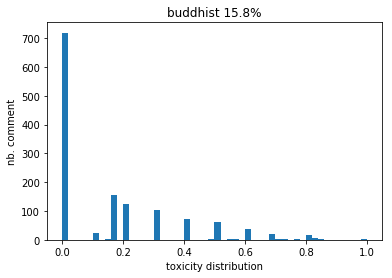

In [26]:
for index, (minority, minority_ratio, nb_toxic, nb_non_toxic, total) in enumerate(ratio_toxicity_minority_list_sorted):
    train_minority = train[train[minority]>0]
    plt.figure(index)
    plt.title(minority+' '+str(int(minority_ratio*1000)/10)+'%')
    plt.hist(train_minority.target.values,bins=50)
    plt.xlabel('toxicity distribution')
    plt.ylabel('nb. comment')
    plt.show()

In [27]:
import os
import json
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from datetime import *
from gensim.test.utils import get_tmpfile
import spacy
import csv
from os import listdir
from os.path import isfile, join
from multiprocessing import Pool

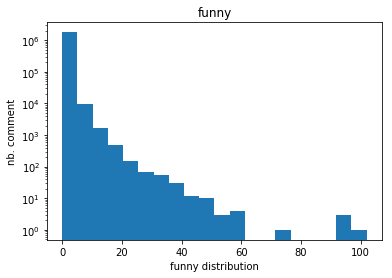

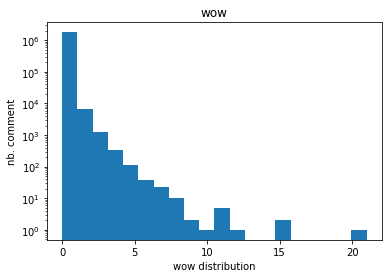

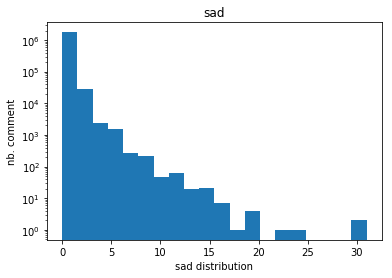

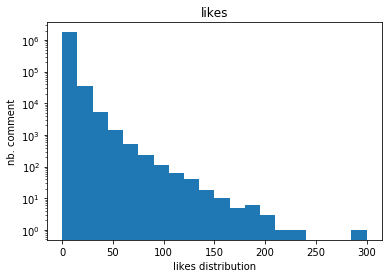

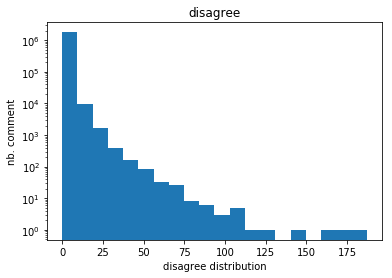

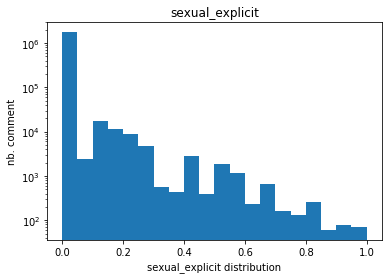

In [28]:
i=0
for label in ['funny','wow','sad','likes','disagree','sexual_explicit']:  
    i+=1
    plt.figure(i)
    plt.title(label)
    plt.hist(train[label].values[:],bins=20)
    plt.xlabel(label+' distribution')
    plt.ylabel('nb. comment')
    plt.yscale('log')
    plt.show()


In [29]:
minority_count_list

[[0.002663115845539281,
  0.003003003003003003,
  0.00342483259213822,
  0.0036603221083455345,
  0.0024445893089960887,
  0.002849776089021577,
  0.0028960324355632784,
  0.0032113037893384713,
  0.0033318089762853598,
  0.0033987915407854984,
  0.0034846400733608437,
  0.0034602076124567475,
  0.002905997829855698,
  0.0031144465290806754,
  0.0028208744710860366,
  0.003672420124862284,
  0.0033921662161445912,
  0.0035859431030360986,
  0.002883762200532387,
  0.0030988534242330336,
  0.0035630567276136896,
  0.003594771241830065,
  0.0030052090289835716],
 [0.002460136674259681,
  0.004204204204204204,
  0.001737974748249246,
  0.0021961932650073207,
  0.001271186440677966,
  0.0011399104356086308,
  0.00405444540978859,
  0.00449582530507386,
  0.0018292284575684328,
  0.004531722054380665,
  0.0024759284731774417,
  0.0028835063437139563,
  0.0010601279636812632,
  0.0016135084427767355,
  0.004231311706629055,
  0.0044069041498347415,
  0.0017490857051995548,
  0.00173320583313

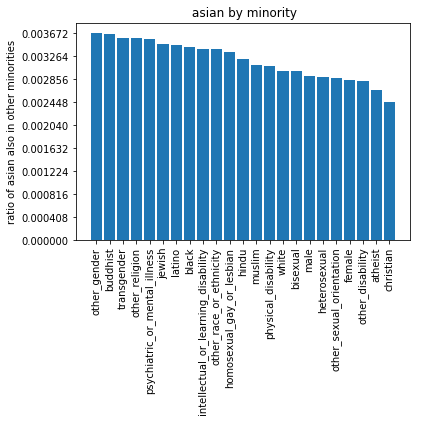

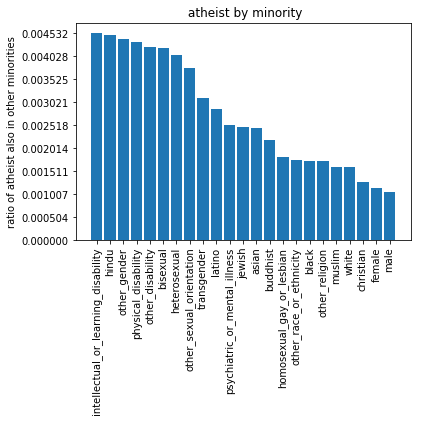

<Figure size 432x288 with 0 Axes>

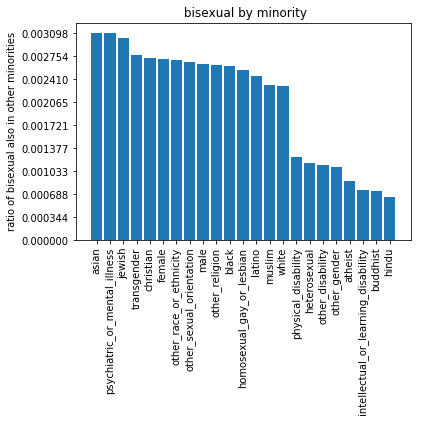

<Figure size 432x288 with 0 Axes>

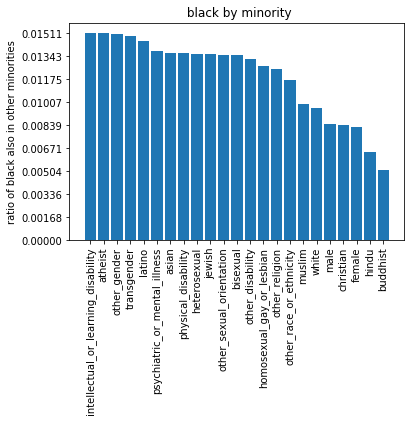

<Figure size 432x288 with 0 Axes>

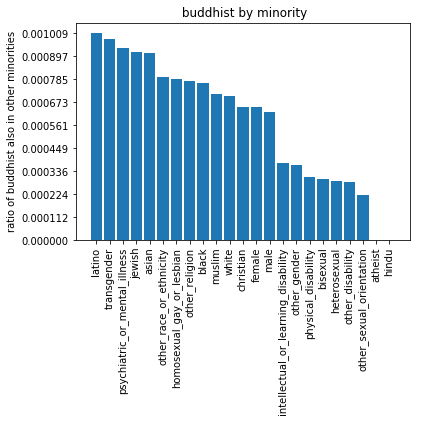

<Figure size 432x288 with 0 Axes>

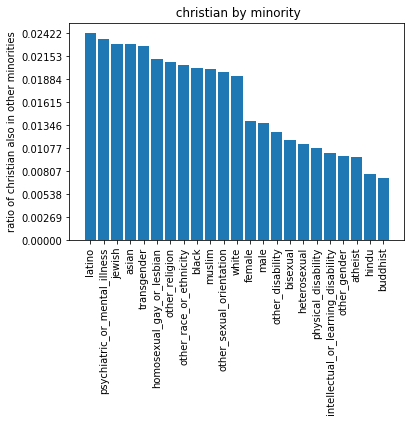

<Figure size 432x288 with 0 Axes>

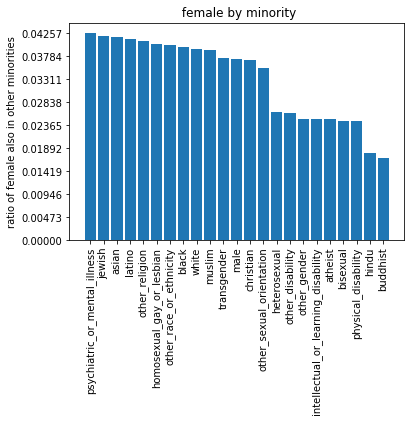

<Figure size 432x288 with 0 Axes>

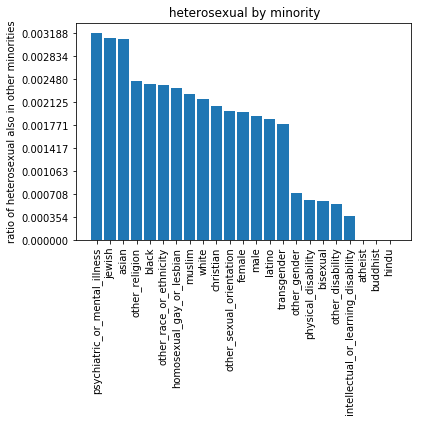

<Figure size 432x288 with 0 Axes>

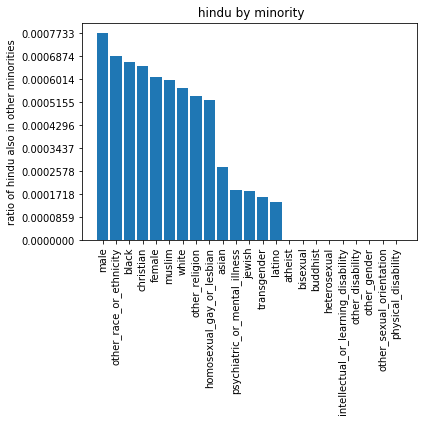

<Figure size 432x288 with 0 Axes>

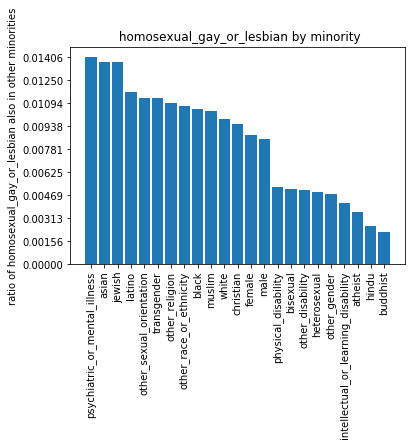

<Figure size 432x288 with 0 Axes>

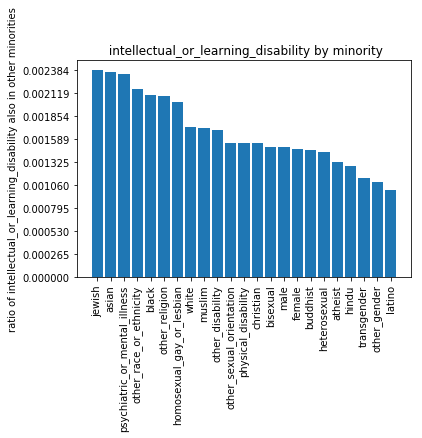

<Figure size 432x288 with 0 Axes>

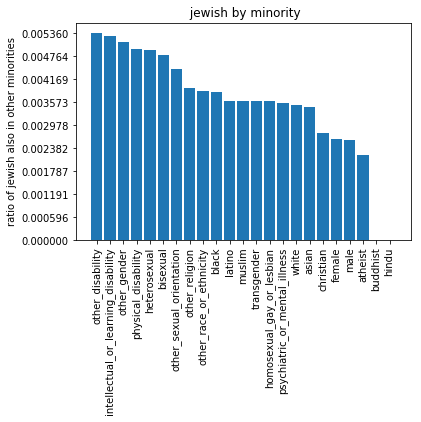

<Figure size 432x288 with 0 Axes>

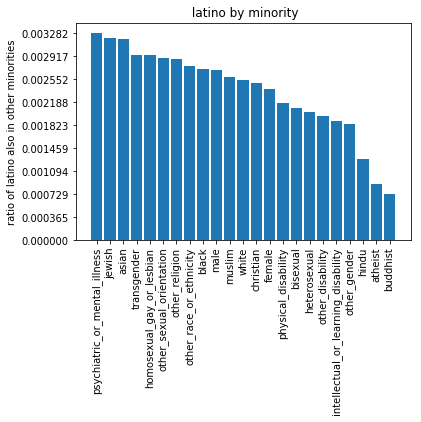

<Figure size 432x288 with 0 Axes>

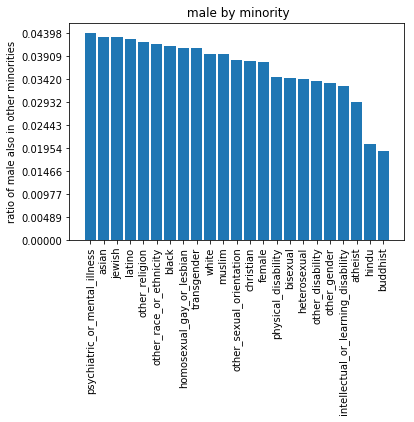

<Figure size 432x288 with 0 Axes>

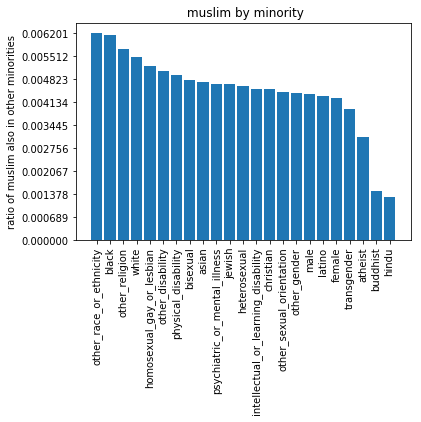

<Figure size 432x288 with 0 Axes>

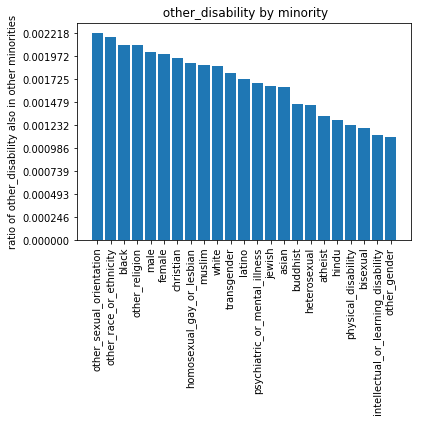

<Figure size 432x288 with 0 Axes>

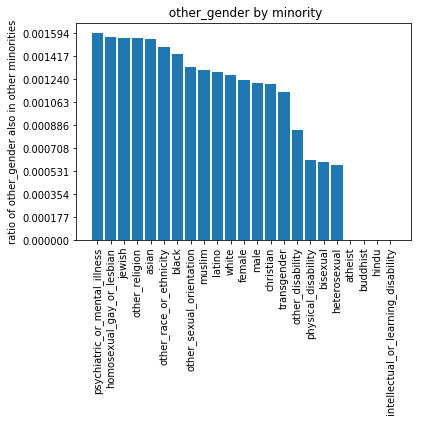

<Figure size 432x288 with 0 Axes>

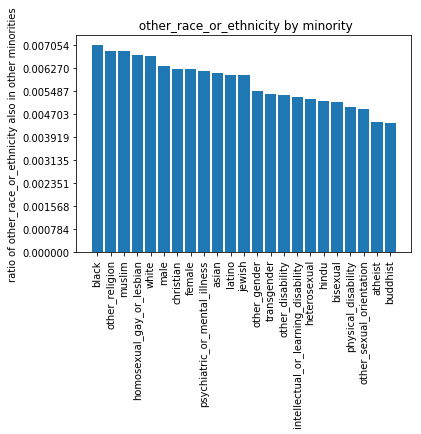

<Figure size 432x288 with 0 Axes>

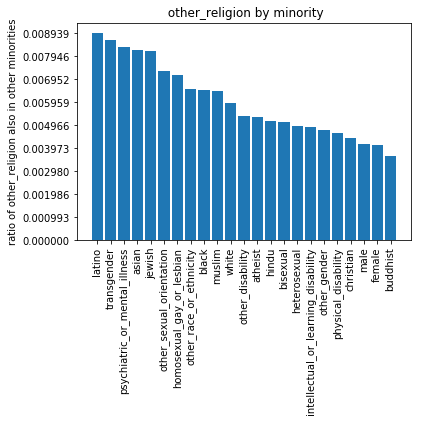

<Figure size 432x288 with 0 Axes>

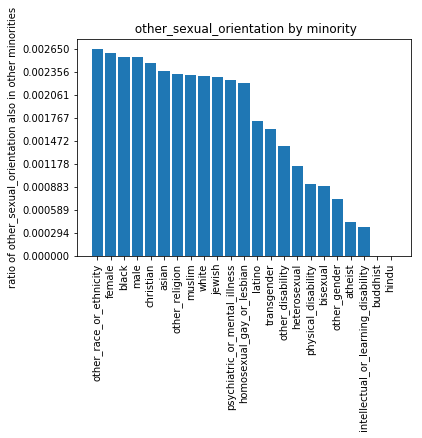

<Figure size 432x288 with 0 Axes>

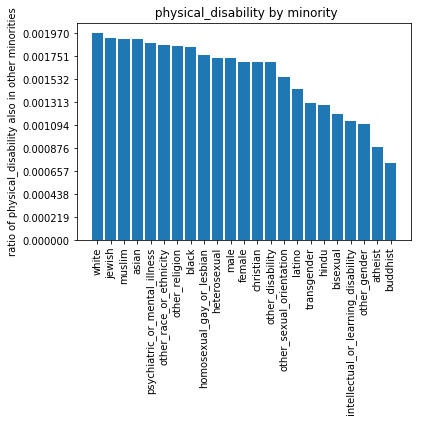

<Figure size 432x288 with 0 Axes>

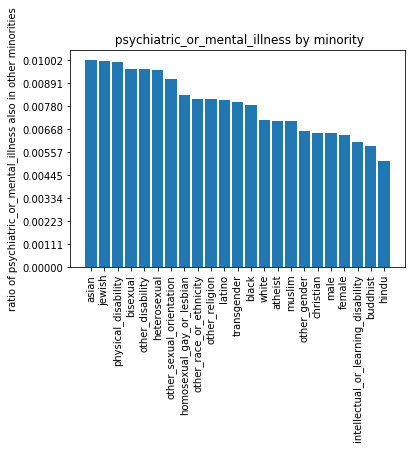

<Figure size 432x288 with 0 Axes>

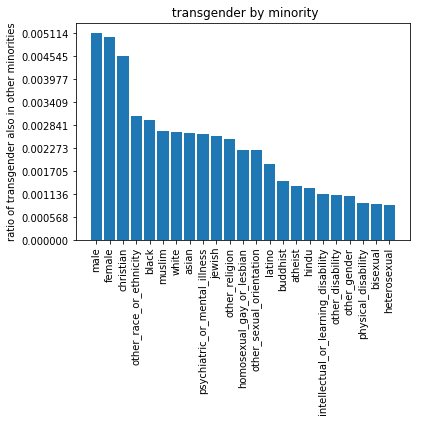

<Figure size 432x288 with 0 Axes>

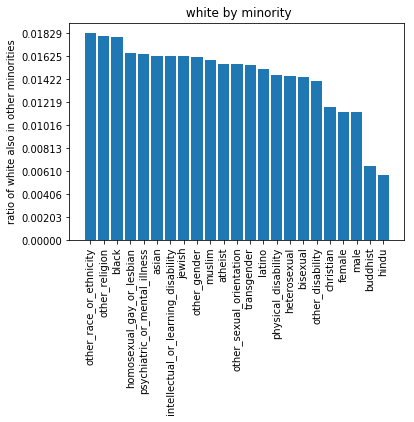

<Figure size 432x288 with 0 Axes>

In [30]:
import pylab
for index, minority in enumerate(minority_list):
    #print(minority)
    #print(minority_count_list[index])
    #print('\n')
    fig = plt.figure(index)
    other_minority_list = list(np.copy(minority_list))
    other_minority_list.remove(minority)
    N = len(ratio_toxicity_minority_list_sorted)-1
    list_to_sort = [(minority_count_list[index][index_2] ,other_minority_list[index_2]) for index_2 in range(len(minority_count_list[index]))]
    common_ratio_minority_list = sorted(list_to_sort,key=lambda x : -x[0])
    common_ratio_list = tuple([elem[0] for elem in common_ratio_minority_list])
    common_label_minority_list = tuple([elem[1] for elem in common_ratio_minority_list])
    
    ind = np.arange(N)    # the x locations for the groups
    width = 0.85       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, common_ratio_list, width)

    plt.ylabel('ratio of '+minority+' also in other minorities')
    plt.title(' '+str(minority)+' by minority')
    plt.xticks(ind, common_label_minority_list,  rotation=90)
    plt.yticks(np.linspace(0, np.max(minority_count_list[index]),10))

    plt.show()
    plt.savefig('barplots/'+minority+'_common_ratio_barplot.jpg', dpi=100)

In [31]:
avg_len = [(len(comment.split(' ')),index) for index, comment in enumerate(train.comment_text.values)]
avg_len_filtered = [elem for elem in avg_len if elem[0] > 200 ]
avg_len_to_plot = [len(comment.split(' ')) for index, comment in enumerate(train.comment_text.values) if len(comment.split(' '))<201]

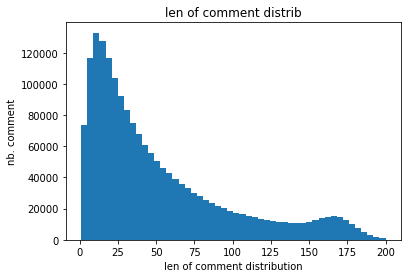

In [32]:
plt.figure(0)
plt.title('len of comment distrib')
plt.hist(avg_len_to_plot,bins=50)
plt.xlabel('len of comment distribution')
plt.ylabel('nb. comment')
plt.show()

In [33]:
len(avg_len_filtered)

1175

In [34]:
train.values[1804872]

array([6334009, 0.6212121212121212,
       'Anyone who is quoted as having the following exchange, even if apocryphal, would have received my vote! \n\nBessie Braddock: "Winston, you are drunk, and what’s more you are disgustingly drunk."\nWinston Churchill: "Bessie, my dear, you are ugly, and what’s more, you are disgustingly ugly. But tomorrow I shall be sober and you will still be disgustingly ugly."',
       0.030303030303030307, 0.030303030303030307, 0.045454545454545456,
       0.6212121212121212, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, '2017-11-11 01:01:10.153692+00', 13, 6333833.0,
       399519, 'approved', 0, 0, 0, 0, 0, 0.0, 0, 66], dtype=object)

In [35]:
train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [36]:
date_list_filter = [(int(date.split(' ')[1].split(':')[0]),int(date.split(' ')[1].split(':')[1])) for date in train.created_date.values]

In [37]:
hour_of_post = [elem[0]+elem[1]/60 for elem in date_list_filter]
hour_of_post

[10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 10.833333333333334,
 18.016666666666666,
 18.183333333333334,
 18.55,
 18.716666666666665,
 18.95,
 19.033333333333335,
 19.066666666666666,
 19.2,
 19.416666666666668,
 19.65,
 19.7,
 19.8,
 19.933333333333334,
 20.083333333333332,
 20.15,
 20.2,
 20.233333333333334,
 20.333333333333332,
 20.433333333333334,
 20.45,
 20.5,
 20.55,
 20.783333333333335,
 20.833333333333332,
 20.883333333333333,
 21.05,
 21.133333333333333,
 22.066666666666666,
 22.266666666666666,
 22.4,
 22.616666666666667,
 22.733333333333334,
 22.75,
 22.766666666666666,
 22.766666666666666,
 22.983333333333334,
 23.266666666666666,
 23.283333333333335,
 23.416666666666668,
 23.55,
 23.55,
 23.7,
 23.85,
 0.18333333333333332,
 0.2,
 0.26666666666666666,
 0.3,
 0.43333333333333335,
 0.5,
 0.5,
 0.7166666666666667,
 0.75,
 0.8333333333333334,
 1.0333333333333334,
 1.1,
 1.2

In [38]:
toxicity_of_post = list(train.target.values)

In [39]:
np.corrcoef(hour_of_post, toxicity_of_post)

array([[ 1.       , -0.0120503],
       [-0.0120503,  1.       ]])

In [40]:
toxicity_of_night_list = [toxicity_of_post[i] for i in range(len(toxicity_of_post)) if hour_of_post[i]>20 and hour_of_post[i]<22]

In [41]:
len(toxicity_of_night_list)

212542

In [42]:
np.mean(toxicity_of_night_list)

0.10244666605681224

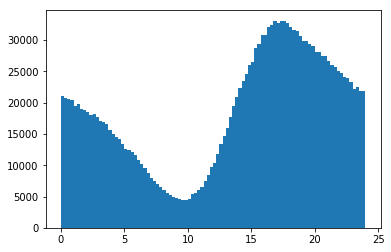

In [43]:
plt.figure(7)
plt.hist(hour_of_post,bins=96)#, toxicity_of_post[:500000],'x')
plt.show()

In [44]:
len(toxicity_of_post)

1804874

In [45]:
train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [56]:
train_group_by_article = train.groupby('article_id').mean()

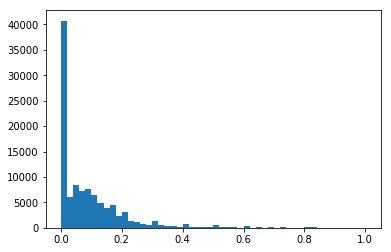

In [62]:
plt.figure(5)
plt.hist(train_group_by_article.target.values,bins=50)
plt.show()

In [66]:
list_article_id_target = [i for i in list(train_group_by_article.target.values) if i==1]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [68]:
train_jewish = train[train.jewish>0]

In [78]:
train_jewish.head(50)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1859,242867,0.300000,"That is a terrible, heart-wrenching, and scary...",0.000000,0.000000,0.300000,0.100000,0.000000,0.0000,0.000000,...,37970,approved,0,0,0,4,0,0.000000,10,10
2009,243506,0.166667,"And this isn't my grandfather's America, willi...",0.000000,0.000000,0.166667,0.000000,0.000000,0.0000,0.000000,...,38213,approved,0,0,0,1,0,0.000000,5,6
2044,243552,0.166667,"I've often wondered why an integrated, multi-e...",0.000000,0.000000,0.166667,0.000000,0.000000,0.0000,0.000000,...,38213,approved,0,0,0,0,0,0.000000,6,6
2045,243553,0.000000,"If you are referring to Israel, I think you ne...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,38213,approved,0,0,0,0,0,0.000000,4,4
2111,243639,0.000000,"How do you define a ""state"" that has no define...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,38213,approved,0,0,0,0,0,0.000000,10,4
2330,243900,0.400000,I can't understand how defenders of Israel can...,0.100000,0.000000,0.400000,0.200000,0.100000,0.0000,0.000000,...,38662,approved,0,0,0,2,0,0.000000,6,10
2332,243902,0.000000,Flylooper - The reason you can't understand......,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,38662,approved,0,0,0,0,0,0.000000,6,4
2338,243908,0.100000,I didn't realize that my Palestinian mother wh...,0.000000,0.000000,0.100000,0.100000,0.000000,0.0000,0.000000,...,38662,approved,0,0,0,4,0,0.000000,6,10
2362,243936,0.000000,"In South Africa's apartheid upheaval, Nelson M...",0.000000,0.000000,0.000000,0.000000,0.000000,0.1000,0.000000,...,38662,approved,0,0,0,1,0,0.000000,10,4
2387,243975,0.000000,Oh please.\nNelson Mandella was a prisoner for...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,38662,approved,0,0,0,2,0,0.000000,10,4


In [79]:
train_jewish.comment_text.values[100]

'I regret not having read this insightful and truly spiritual post before now.  Thank you for your very moving reminder.  In the words the Messiah commanded his disciples to use when greeting one another (as recorded in the gospel named for St. Luke), and which the most noble Messenger Muhammad admonished his followers, thus establishing Jesus\' command among us for all time, "Shalom alaychem = Al-Salaam alaykum = The Peace (of God) be on you".'

In [13]:
x_train = preprocess(train['comment_text'])
y_aux_train = train[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']]
x_test = preprocess(test['comment_text'])

identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']
# Overall
weights = np.ones((len(x_train),)) / 4
# Subgroup
weights += (train[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int) / 4
# Background Positive, Subgroup Negative
weights += (( (train['target'].values>=0.5).astype(bool).astype(np.int) +
   (train[identity_columns].fillna(0).values<0.5).sum(axis=1).astype(bool).astype(np.int) ) > 1 ).astype(bool).astype(np.int) / 4
# Background Negative, Subgroup Positive
weights += (( (train['target'].values<0.5).astype(bool).astype(np.int) +
   (train[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int) ) > 1 ).astype(bool).astype(np.int) / 4
loss_weight = 1.0 / weights.mean()

NameError: name 'preprocess' is not defined

In [7]:
y_train = np.vstack([(train['target'].values>=0.5).astype(np.int)]).T

In [8]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [2]:
x_train

NameError: name 'x_train' is not defined